# Credit Card Fraud Detection
#### through

* Local Outlier Factor (LOF)
* Isolation Forest Algorithm

In [3]:
# import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Sections

#### 1. Dataset Loading and Analysis
#### 2. Data Visualization
#### 3. Feature Selection
#### 4. Model Training & Testing
#### 5. Performance comparison between LOF and IF using evaluation metrics

### 1. Dataset Loading and Analysis

In [4]:
# Load Dataset into a dataframeframe using pandas
dataframe = pd.read_csv('creditcard.csv')

In [5]:
print("Shape of the Dataset: ", dataframe.shape) # number of rows and columns in our dataset
print("\n\n", dataframe.columns) # columns/features in our Dataset

Shape of the Dataset:  (284807, 31)


 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
dataframe.head() # first five records

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
dataframe.tail() # last five records

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
# Print the shape of the dataframe

dataframe = dataframe.sample(frac = 0.3, random_state = 42) # using 30% of our dataset for next steps
print("Shape of the Dataset: ", dataframe.shape)

Shape of the Dataset:  (85442, 31)


In [9]:
# Determine number of fraud cases in Dataset

Fraud = dataframe[dataframe['Class'] == 1]
Valid = dataframe[dataframe['Class'] == 0]

outlier_fraction = (len(Fraud)/float(len(Valid)))
print("Outlier_fraction: {0} %".format(outlier_fraction*100))

print('Fraud Cases: {}'.format(len(dataframe[dataframe['Class'] == 1])))
print('Valid Transactions: {}'.format(len(dataframe[dataframe['Class'] == 0])))

Outlier_fraction: 0.15942606616181745 %
Fraud Cases: 136
Valid Transactions: 85306


In [10]:
print("Description of the Dataset: ", dataframe.describe())

# The columns have been encrypted using PCA Dimensionality reduction to protect user identities and sensitive features

Description of the Dataset:                  Time            V1            V2            V3            V4  \
count   85442.000000  85442.000000  85442.000000  85442.000000  85442.000000   
mean    94967.874862      0.003465      0.005440     -0.004776      0.002485   
std     47520.526676      1.953426      1.611981      1.520529      1.413738   
min         0.000000    -37.558067    -48.060856    -33.680984     -5.600607   
25%     54257.500000     -0.918861     -0.597627     -0.898758     -0.845937   
50%     84962.000000      0.027558      0.063774      0.172342     -0.015543   
75%    139498.000000      1.318759      0.804713      1.024434      0.748582   
max    172787.000000      2.439207     21.467203      9.382558     12.699542   

                 V5            V6            V7            V8            V9  \
count  85442.000000  85442.000000  85442.000000  85442.000000  85442.000000   
mean      -0.001153      0.004429     -0.006112      0.002718      0.000754   
std        1.

### 2. dataframe Visualization

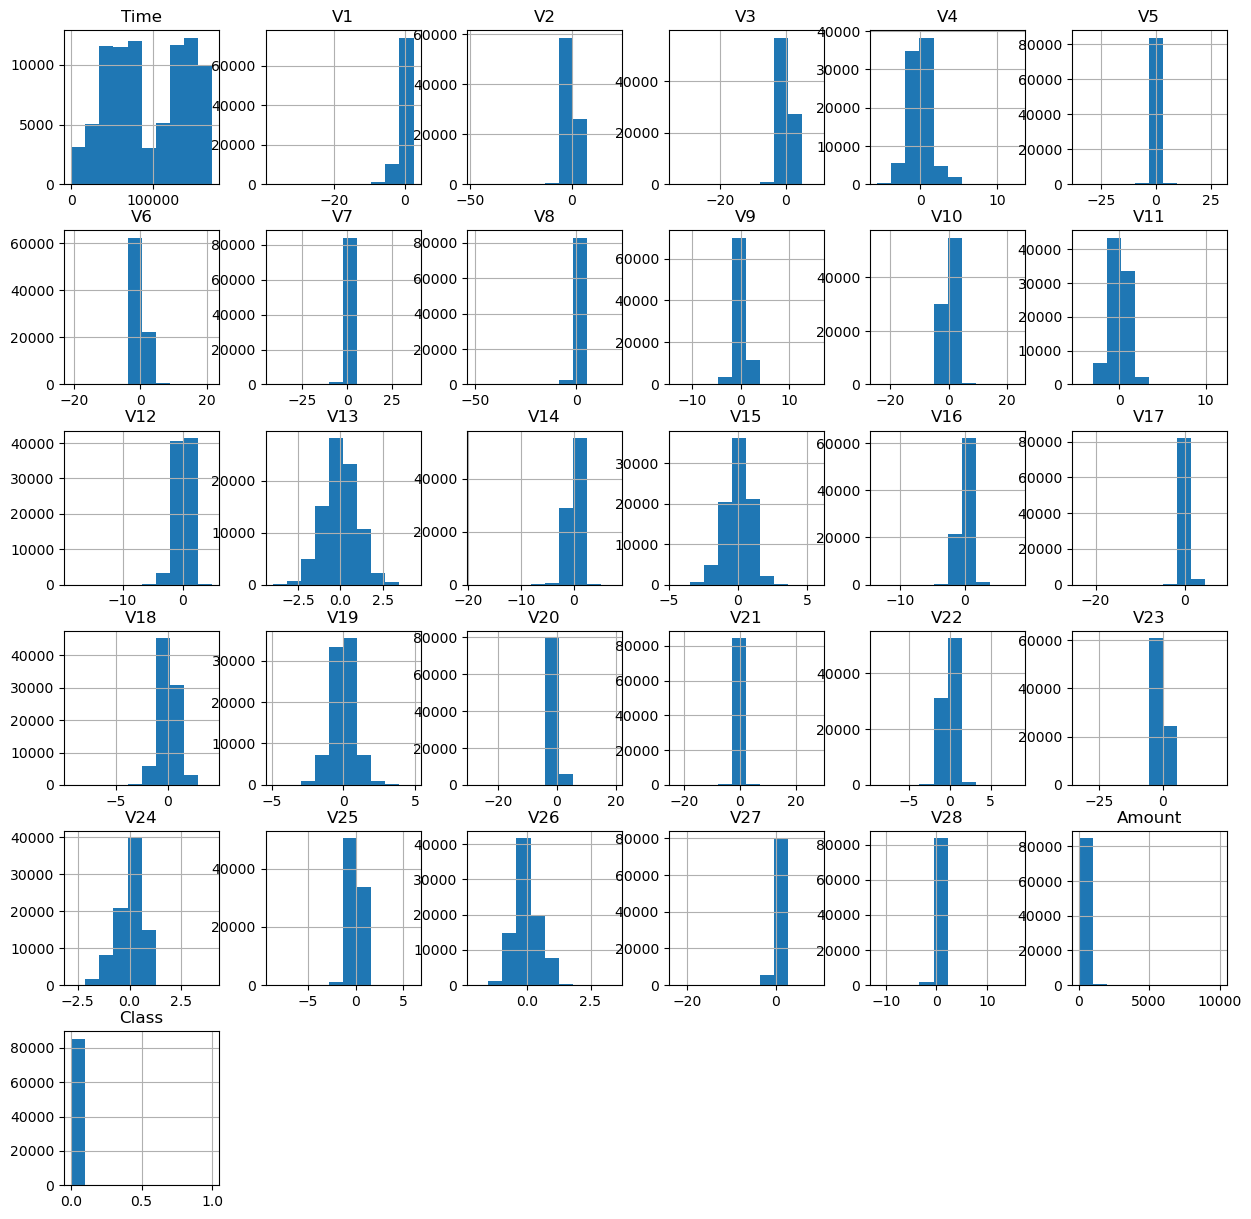

In [11]:
# Plot histograms for each parameter 

dataframe.hist(figsize = (15, 15))
plt.show()

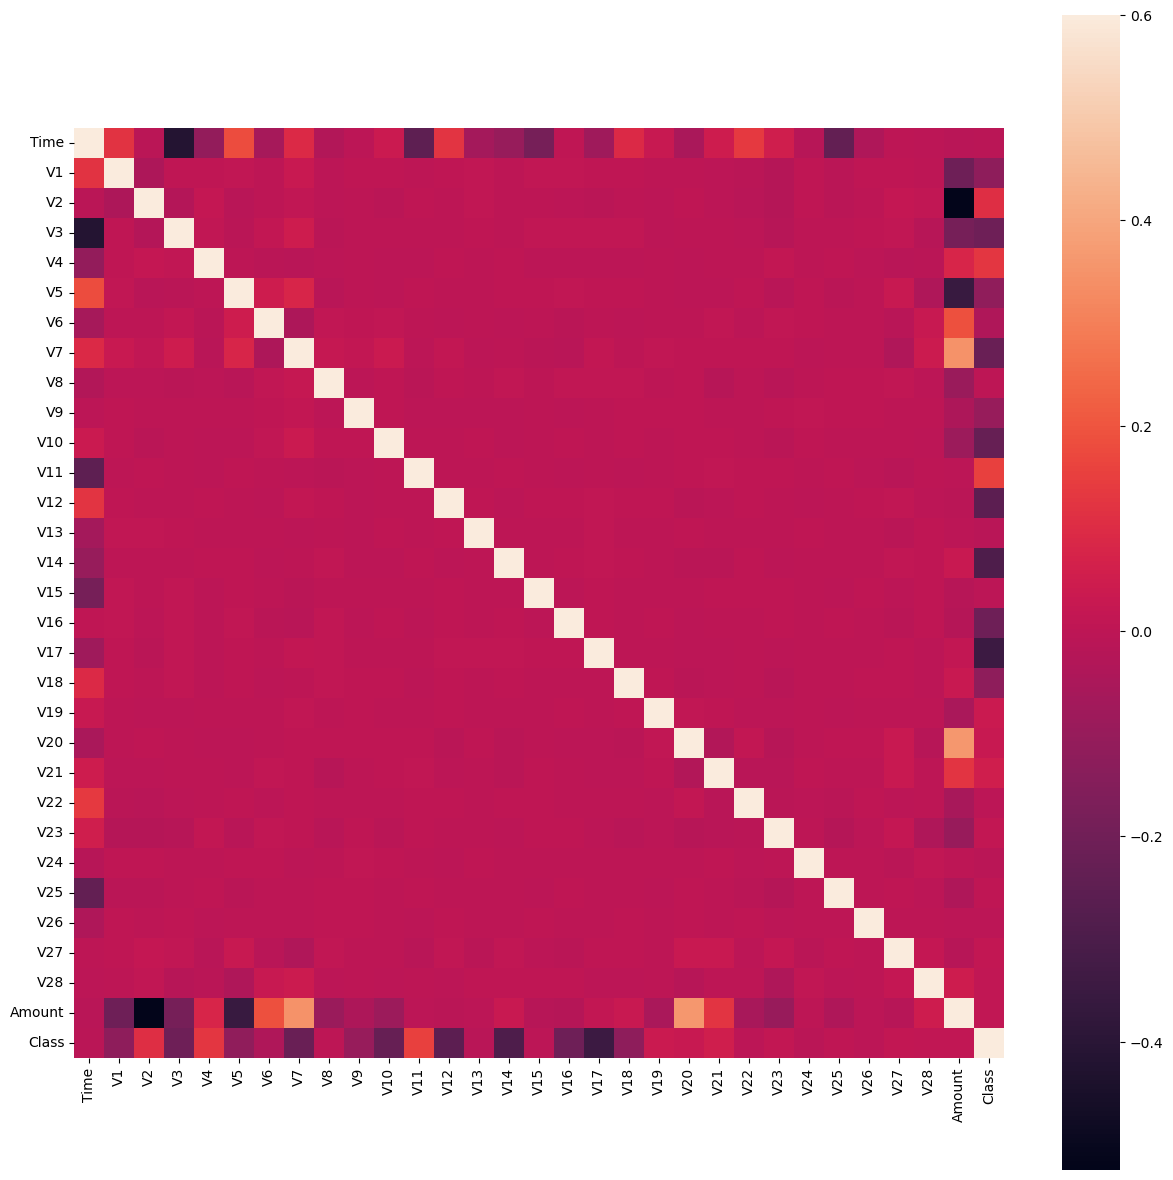

In [12]:
# Correlation matrix

corrmat = dataframe.corr()
fig = plt.figure(figsize = (15, 15))

#Plotting a heatmap to visualize the correlation matrix and see features 
# with strong correlation to the target class
sns.heatmap(corrmat, vmax = .6, square = True) # vmax is the max and min value you want to have for the scale
plt.show()

In [13]:
corrmat['Class']

Time     -0.008402
V1       -0.121864
V2        0.105051
V3       -0.208042
V4        0.128095
V5       -0.118543
V6       -0.038185
V7       -0.217359
V8       -0.001888
V9       -0.099826
V10      -0.228272
V11       0.153159
V12      -0.256577
V13      -0.012188
V14      -0.294882
V15      -0.006388
V16      -0.205082
V17      -0.345739
V18      -0.121619
V19       0.034440
V20       0.025939
V21       0.052617
V22      -0.003520
V23       0.011271
V24      -0.006823
V25       0.005641
V26      -0.002010
V27       0.013635
V28       0.007974
Amount    0.009849
Class     1.000000
Name: Class, dtype: float64

In [14]:
len(corrmat['Class'])

31

### 3. Feature Selection

In [15]:
# getting columns which have correlation score > 0.01 or < -0.01, you can chose a different constant and experiment
cols = corrmat.keys()
cols_to_keep = []

for i in range(len(corrmat)):
    
    if abs(corrmat['Class'][i]) > 0.01:
        
        cols_to_keep.append(cols[i])

In [16]:
len(cols_to_keep) # the final features list we wish to keep

22

In [17]:
cols_to_keep

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V23',
 'V27',
 'Class']

In [18]:
# removing the 'Class' columnn from the features list, as it is the variable we wish to predict
cols = cols_to_keep[:-1]

In [19]:
features = dataframe[cols] # records of all transactions, excluding the target class
target = dataframe["Class"] # records of the corresponding label for each record

print(features.shape)
print(target.shape)

(85442, 21)
(85442,)


### 4. Model Training and Testing

The machine learning algorithms that we are going to use are:

1. Local Outlier Factor
2. Isolation Forest

We are using them by importing them directly from scikit-learn; however, if you're interested in learning about their theory, you can refer to the two resources mentioned below:

##### LOF: https://towardsdataframescience.com/local-outlier-factor-for-anomaly-detection-cc0c770d2ebe

##### IF: https://medium.com/@often_weird/isolation-forest-algorithm-for-anomaly-detection-f88af2d5518d

In [20]:
# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "IF": IsolationForest(max_samples = len(features),
                                        contamination = outlier_fraction,
                                        random_state = state),
    "LOF": LocalOutlierFactor(
        n_neighbors = 20,
        contamination = outlier_fraction)}

In [21]:
# skipping the train, test split step because we wish the model to overfit on these features and learn 
# a mathematical function to map the features

n_outliers = len(Fraud)

# Fit the model
for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the dataframe and tag outliers
    if clf_name == "LOF":
        
        y_pred = clf.fit_predict(features)
        scores_pred = clf.negative_outlier_factor_
        
    else:
        
        # train/fit classifier on our features
        clf.fit(features)
        # generate predictions 
        scores_pred = clf.decision_function(features)
        y_pred = clf.predict(features)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud.
    
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != target).sum()
    
    # Run classification metrics
    print('Classifier {0}: \nNumber of Errors: {1}'.format(clf_name, n_errors))
    print('Accuracy: {0}%\n'.format(accuracy_score(target, y_pred)*100))
    print(classification_report(target, y_pred))

C:\Users\Public\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Classifier IF: 
Number of Errors: 173
Accuracy: 99.797523466211%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.36      0.37      0.37       136

    accuracy                           1.00     85442
   macro avg       0.68      0.68      0.68     85442
weighted avg       1.00      1.00      1.00     85442

Classifier LOF: 
Number of Errors: 273
Accuracy: 99.68048500737342%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85442
   macro avg       0.50      0.50      0.50     85442
weighted avg       1.00      1.00      1.00     85442



We can see that both the algorithms are performing good, and have an accuracy above 99%. IF has greater accuracy than LOF algorithm, which suggest its efficiency in working with this particular dataset.